###e5###

1 256 512 1024

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.8532 - loss: 0.5370 - val_accuracy: 0.9532 - val_loss: 0.1566
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9608 - loss: 0.1395 - val_accuracy: 0.9669 - val_loss: 0.1089
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9735 - loss: 0.0941 - val_accuracy: 0.9696 - val_loss: 0.0947
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9805 - loss: 0.0672 - val_accuracy: 0.9764 - val_loss: 0.0818
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9858 - loss: 0.0492 - val_accuracy: 0.9778 - val_loss: 0.0741
Training time: 46.8026704788208 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9740 - loss: 0.0851
Test Accuracy: 0.9778000116348267
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9779
Recall: 0.9778
F1 Score: 0.9778


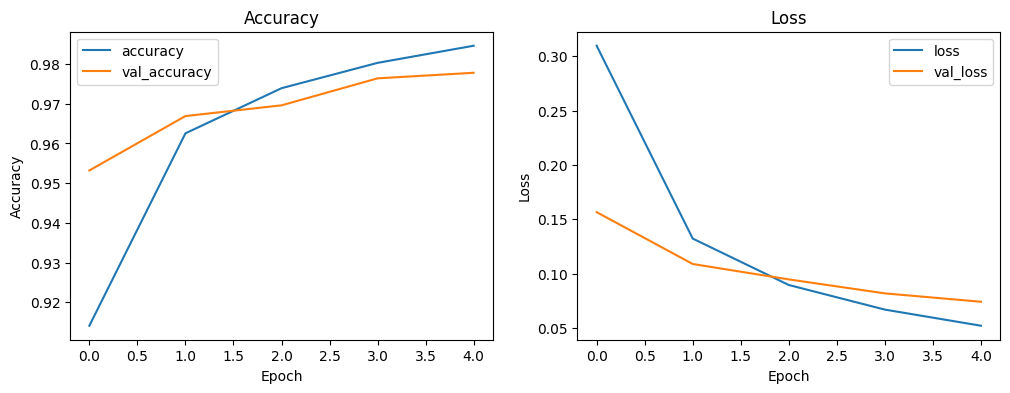

In [1]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8717 - loss: 0.4598 - val_accuracy: 0.9610 - val_loss: 0.1337
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9661 - loss: 0.1147 - val_accuracy: 0.9710 - val_loss: 0.0923
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9793 - loss: 0.0685 - val_accuracy: 0.9762 - val_loss: 0.0753
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9857 - loss: 0.0492 - val_accuracy: 0.9788 - val_loss: 0.0686
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9904 - loss: 0.0351 - val_accuracy: 0.9792 - val_loss: 0.0685
Training time: 48.7017982006073 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0807
Test Accuracy: 0.979200005531311
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9794
Recall: 0.9792
F1 Score: 0.9792


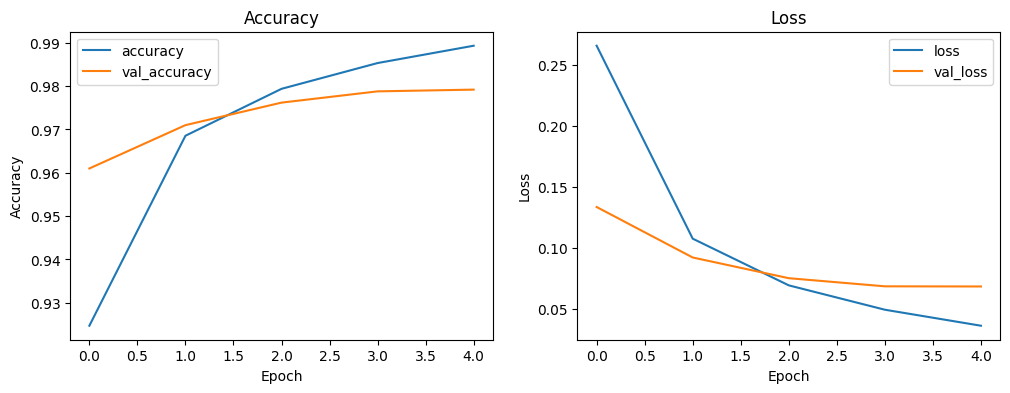

In [2]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8878 - loss: 0.4052 - val_accuracy: 0.9603 - val_loss: 0.1237
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9721 - loss: 0.0952 - val_accuracy: 0.9751 - val_loss: 0.0842
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9840 - loss: 0.0557 - val_accuracy: 0.9778 - val_loss: 0.0727
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9884 - loss: 0.0394 - val_accuracy: 0.9811 - val_loss: 0.0586
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9931 - loss: 0.0248 - val_accuracy: 0.9818 - val_loss: 0.0613
Training time: 61.16759657859802 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9783 - loss: 0.0753
Test Accuracy: 0.9818000197410583
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9819
Recall: 0.9818
F1 Score: 0.9818


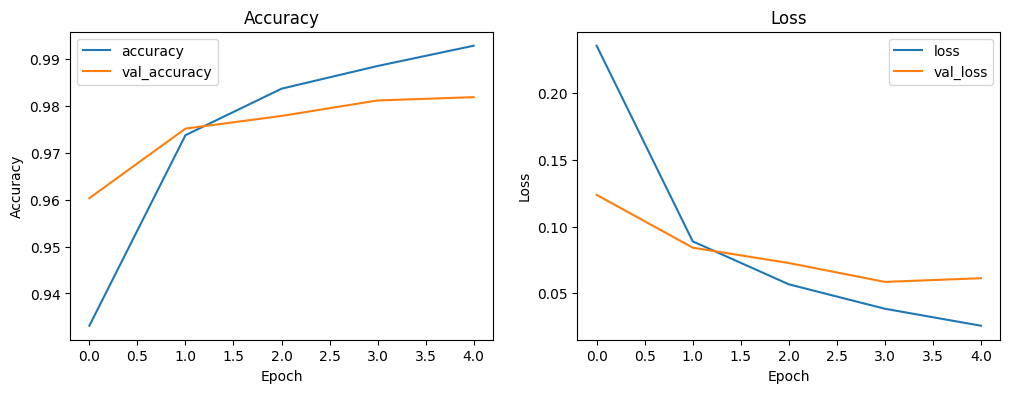

In [3]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


2 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8642 - loss: 0.4843 - val_accuracy: 0.9633 - val_loss: 0.1243
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9678 - loss: 0.1082 - val_accuracy: 0.9741 - val_loss: 0.0865
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9797 - loss: 0.0650 - val_accuracy: 0.9770 - val_loss: 0.0740
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9876 - loss: 0.0419 - val_accuracy: 0.9799 - val_loss: 0.0698
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9906 - loss: 0.0295 - val_accuracy: 0.9803 - val_loss: 0.0726
Training time: 24.69279956817627 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9768 - loss: 0.0871
Test Accuracy: 0.9803000092506409
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Precision: 0.9804
Recall: 0.9803
F1 Score: 0.9803


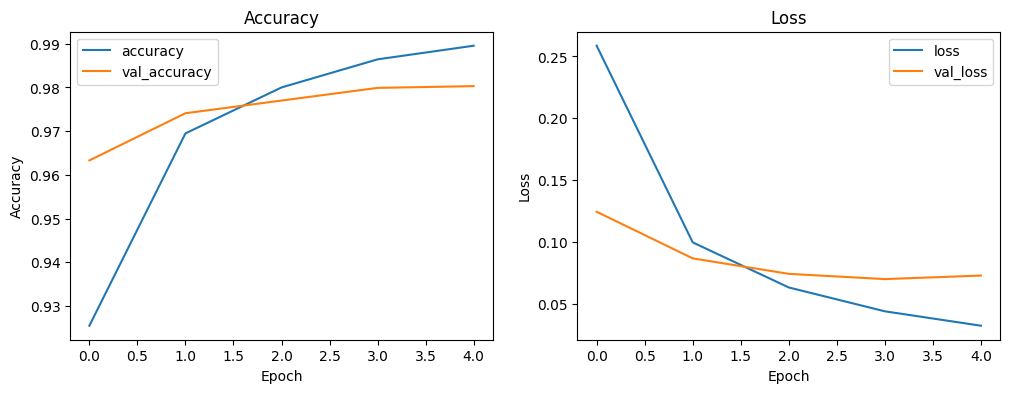

In [4]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8800 - loss: 0.4078 - val_accuracy: 0.9674 - val_loss: 0.0998
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9754 - loss: 0.0799 - val_accuracy: 0.9771 - val_loss: 0.0677
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9856 - loss: 0.0457 - val_accuracy: 0.9783 - val_loss: 0.0668
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9884 - loss: 0.0373 - val_accuracy: 0.9783 - val_loss: 0.0708
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9927 - loss: 0.0234 - val_accuracy: 0.9790 - val_loss: 0.0737
Training time: 51.28818392753601 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9727 - loss: 0.0975
Test Accuracy: 0.9789999723434448
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9791
Recall: 0.9790
F1 Score: 0.9790


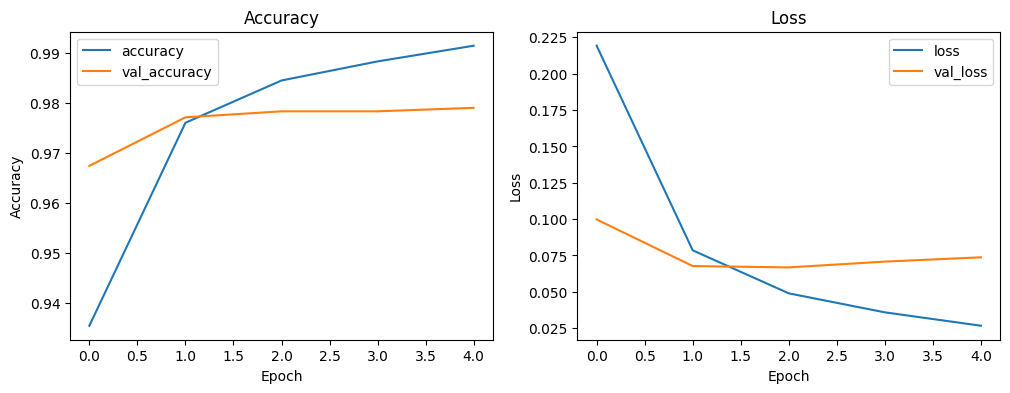

In [5]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.8922 - loss: 0.3460 - val_accuracy: 0.9703 - val_loss: 0.0990
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9778 - loss: 0.0697 - val_accuracy: 0.9753 - val_loss: 0.0811
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9844 - loss: 0.0455 - val_accuracy: 0.9762 - val_loss: 0.0785
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9891 - loss: 0.0333 - val_accuracy: 0.9804 - val_loss: 0.0689
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.9918 - loss: 0.0238 - val_accuracy: 0.9776 - val_loss: 0.0856
Training time: 189.12762188911438 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9710 - loss: 0.1152
Test Accuracy: 0.9775999784469604
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.9778
Recall: 0.9776
F1 Score: 0.9776


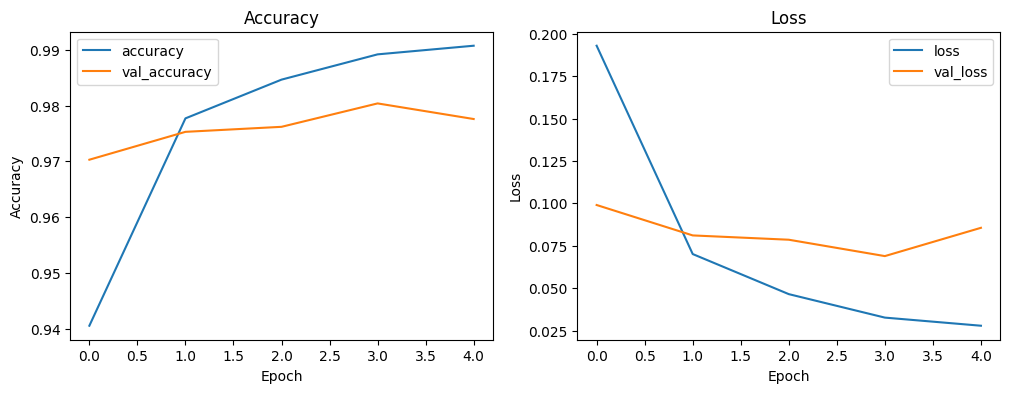

In [6]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


3 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8586 - loss: 0.4772 - val_accuracy: 0.9643 - val_loss: 0.1128
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9709 - loss: 0.0936 - val_accuracy: 0.9719 - val_loss: 0.0914
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9811 - loss: 0.0596 - val_accuracy: 0.9693 - val_loss: 0.0985
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9768 - val_loss: 0.0801
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9891 - loss: 0.0326 - val_accuracy: 0.9735 - val_loss: 0.0925
Training time: 38.67602896690369 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 0.1172
Test Accuracy: 0.9735000133514404
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Precision: 0.9739
Recall: 0.9735
F1 Score: 0.9735


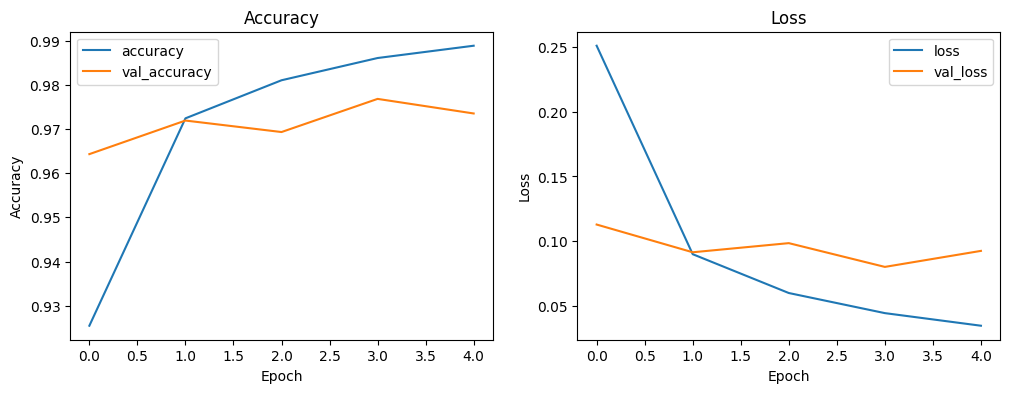

In [7]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8792 - loss: 0.3965 - val_accuracy: 0.9678 - val_loss: 0.1004
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9737 - loss: 0.0862 - val_accuracy: 0.9780 - val_loss: 0.0734
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9769 - val_loss: 0.0734
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9824 - val_loss: 0.0559
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9910 - loss: 0.0281 - val_accuracy: 0.9765 - val_loss: 0.0861
Training time: 87.05102515220642 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9714 - loss: 0.1012
Test Accuracy: 0.9764999747276306
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9770
Recall: 0.9765
F1 Score: 0.9766


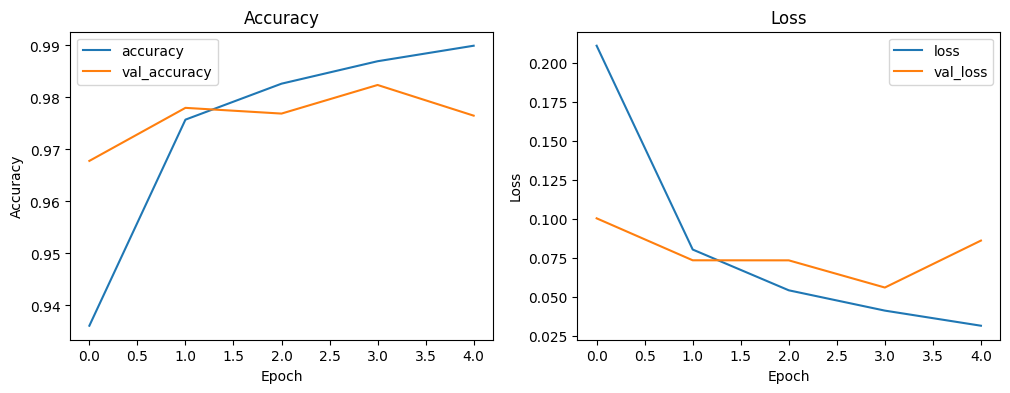

In [8]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.8944 - loss: 0.3404 - val_accuracy: 0.9692 - val_loss: 0.0966
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9735 - loss: 0.0852 - val_accuracy: 0.9673 - val_loss: 0.1012
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 90ms/step - accuracy: 0.9838 - loss: 0.0522 - val_accuracy: 0.9780 - val_loss: 0.0713
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 82ms/step - accuracy: 0.9865 - loss: 0.0399 - val_accuracy: 0.9793 - val_loss: 0.0698
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.9896 - loss: 0.0332 - val_accuracy: 0.9780 - val_loss: 0.0833
Training time: 244.69138383865356 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9731 - loss: 0.1032
Test Accuracy: 0.9779999852180481
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Precision: 0.9781
Recall: 0.9780
F1 Score: 0.9780


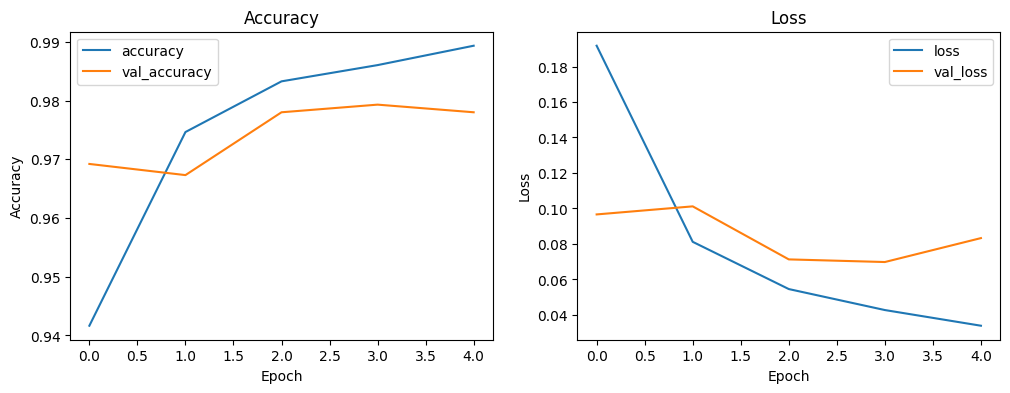

In [9]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

4 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8537 - loss: 0.4822 - val_accuracy: 0.9659 - val_loss: 0.1064
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9677 - loss: 0.1020 - val_accuracy: 0.9745 - val_loss: 0.0829
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9801 - loss: 0.0637 - val_accuracy: 0.9744 - val_loss: 0.0823
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9853 - loss: 0.0455 - val_accuracy: 0.9763 - val_loss: 0.0735
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9776 - val_loss: 0.0788
Training time: 49.05797362327576 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.0909
Test Accuracy: 0.9775999784469604
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9778
Recall: 0.9776
F1 Score: 0.9776


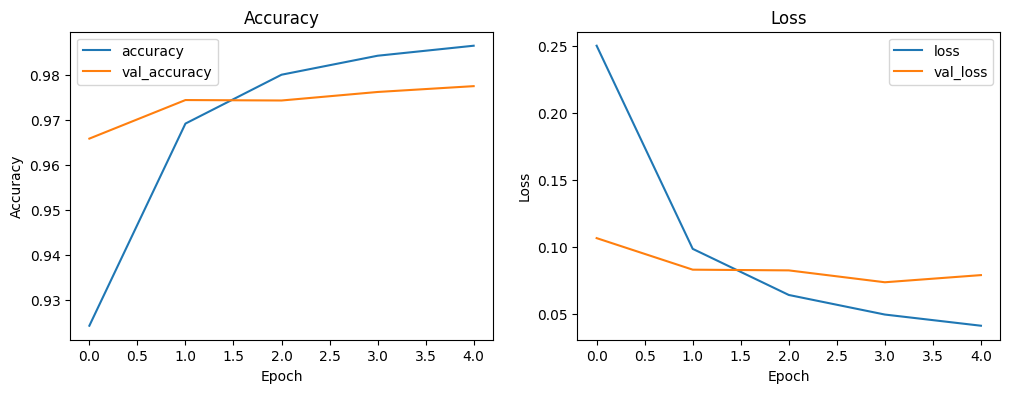

In [10]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8786 - loss: 0.3993 - val_accuracy: 0.9701 - val_loss: 0.0956
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9707 - loss: 0.0945 - val_accuracy: 0.9704 - val_loss: 0.0938
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9811 - loss: 0.0598 - val_accuracy: 0.9787 - val_loss: 0.0730
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.9868 - loss: 0.0419 - val_accuracy: 0.9789 - val_loss: 0.0683
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.9897 - loss: 0.0334 - val_accuracy: 0.9778 - val_loss: 0.0782
Training time: 90.43330001831055 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9747 - loss: 0.0904
Test Accuracy: 0.9778000116348267
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.9780
Recall: 0.9778
F1 Score: 0.9778


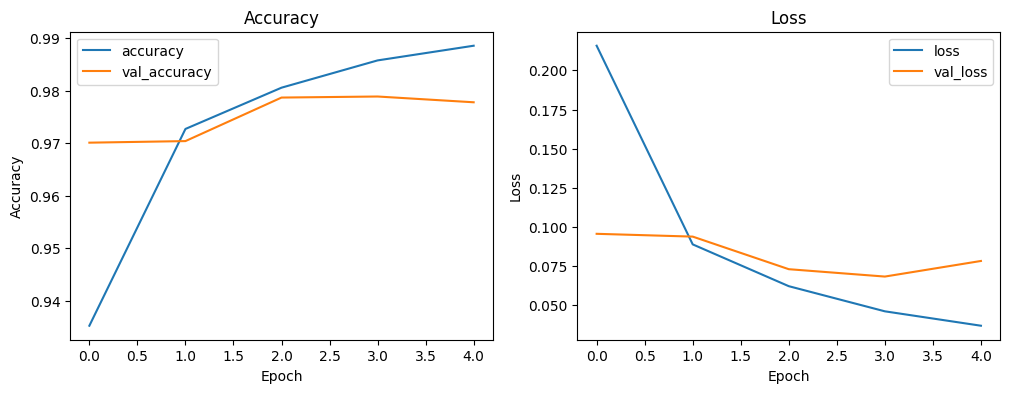

In [11]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 63s 130ms/step - accuracy: 0.8852 - loss: 0.3671 - val_accuracy: 0.9656 - val_loss: 0.1124
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 114ms/step - accuracy: 0.9726 - loss: 0.0926 - val_accuracy: 0.9748 - val_loss: 0.0860
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9813 - loss: 0.0613 - val_accuracy: 0.9785 - val_loss: 0.0740
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9868 - loss: 0.0437 - val_accuracy: 0.9769 - val_loss: 0.0781
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 110ms/step - accuracy: 0.9887 - loss: 0.0382 - val_accuracy: 0.9725 - val_loss: 0.1091
Training time: 302.5931701660156 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9668 - loss: 0.1287
Test Accuracy: 0.9725000262260437
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Precision: 0.9730
Recall: 0.9725
F1 Score: 0.9726


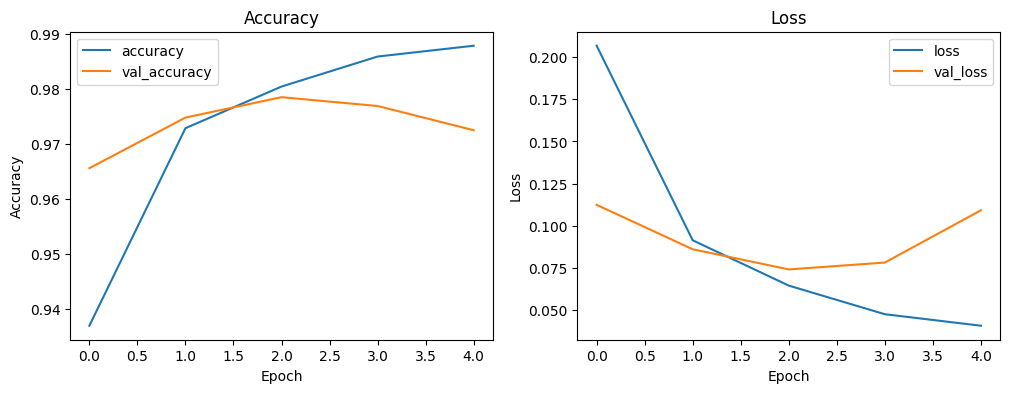

In [12]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

5 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8509 - loss: 0.4719 - val_accuracy: 0.9622 - val_loss: 0.1288
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9674 - loss: 0.1060 - val_accuracy: 0.9689 - val_loss: 0.1047
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9770 - loss: 0.0745 - val_accuracy: 0.9658 - val_loss: 0.1104
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9828 - loss: 0.0554 - val_accuracy: 0.9743 - val_loss: 0.0868
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9867 - loss: 0.0437 - val_accuracy: 0.9743 - val_loss: 0.0891
Training time: 46.14592623710632 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9694 - loss: 0.1105
Test Accuracy: 0.9743000268936157
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9745
Recall: 0.9743
F1 Score: 0.9743


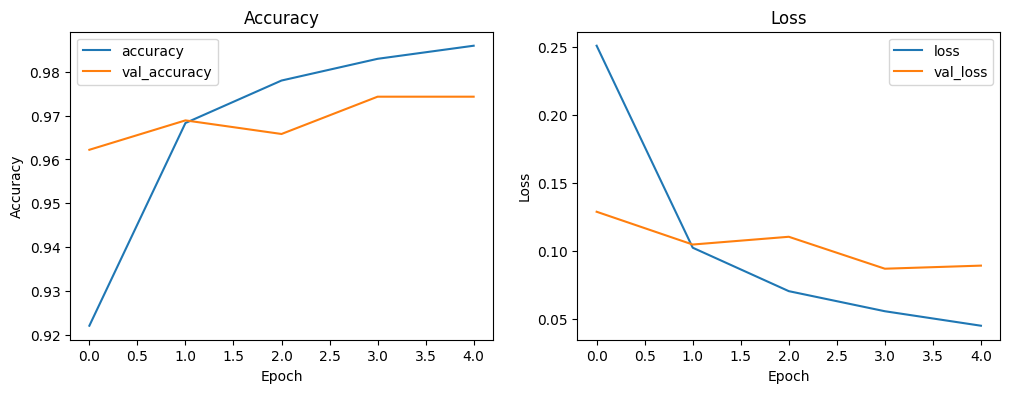

In [13]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.8671 - loss: 0.4212 - val_accuracy: 0.9675 - val_loss: 0.1092
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9722 - loss: 0.0941 - val_accuracy: 0.9697 - val_loss: 0.1001
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9805 - loss: 0.0646 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9847 - loss: 0.0481 - val_accuracy: 0.9770 - val_loss: 0.0850
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9883 - loss: 0.0392 - val_accuracy: 0.9764 - val_loss: 0.0928
Training time: 121.19110441207886 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9708 - loss: 0.1151
Test Accuracy: 0.9764000177383423
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.9766
Recall: 0.9764
F1 Score: 0.9764


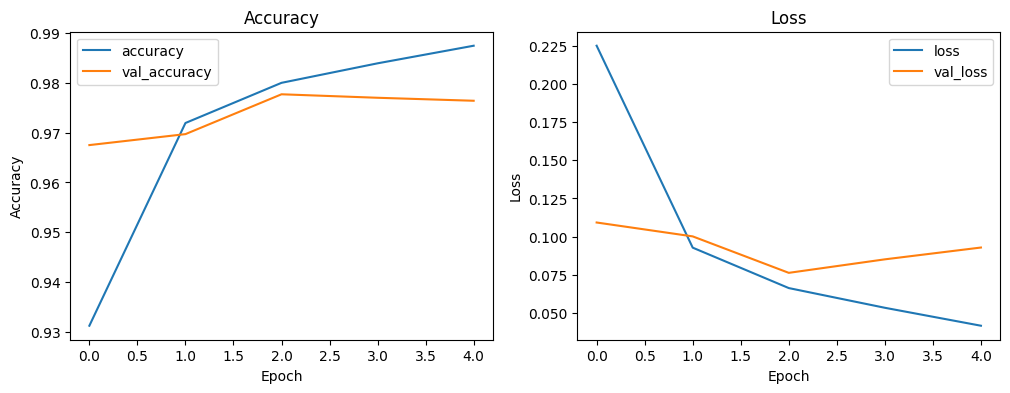

In [14]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 145ms/step - accuracy: 0.8691 - loss: 0.4115 - val_accuracy: 0.9655 - val_loss: 0.1218
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 66s 142ms/step - accuracy: 0.9725 - loss: 0.0978 - val_accuracy: 0.9754 - val_loss: 0.0965
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.9792 - loss: 0.0741 - val_accuracy: 0.9704 - val_loss: 0.1166
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.9837 - loss: 0.0580 - val_accuracy: 0.9796 - val_loss: 0.0798
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 141ms/step - accuracy: 0.9870 - loss: 0.0446 - val_accuracy: 0.9718 - val_loss: 0.1309
Training time: 398.04101300239563 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9702 - loss: 0.1409
Test Accuracy: 0.9718000292778015
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Precision: 0.9723
Recall: 0.9718
F1 Score: 0.9718


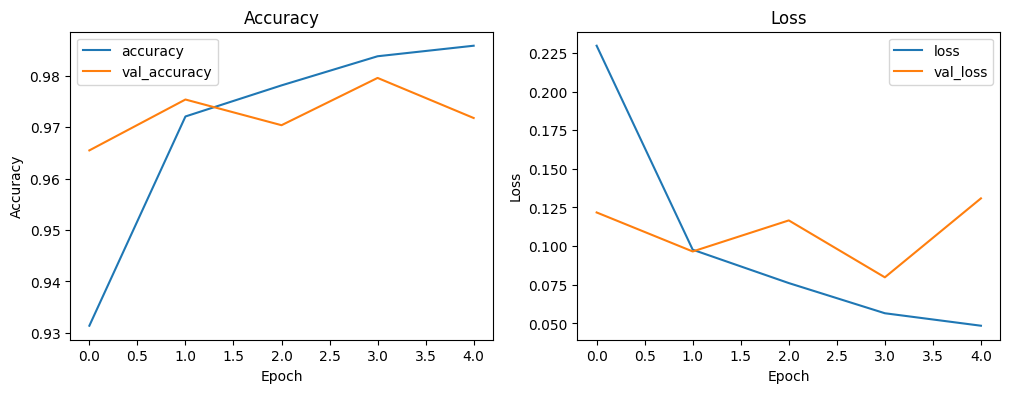

In [15]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

6 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8528 - loss: 0.5060 - val_accuracy: 0.9630 - val_loss: 0.1282
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9664 - loss: 0.1122 - val_accuracy: 0.9730 - val_loss: 0.0888
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9782 - loss: 0.0725 - val_accuracy: 0.9687 - val_loss: 0.1023
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9825 - loss: 0.0577 - val_accuracy: 0.9747 - val_loss: 0.0887
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9777 - val_loss: 0.0820
Training time: 44.52842092514038 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0955
Test Accuracy: 0.9776999950408936
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.9779
Recall: 0.9777
F1 Score: 0.9777


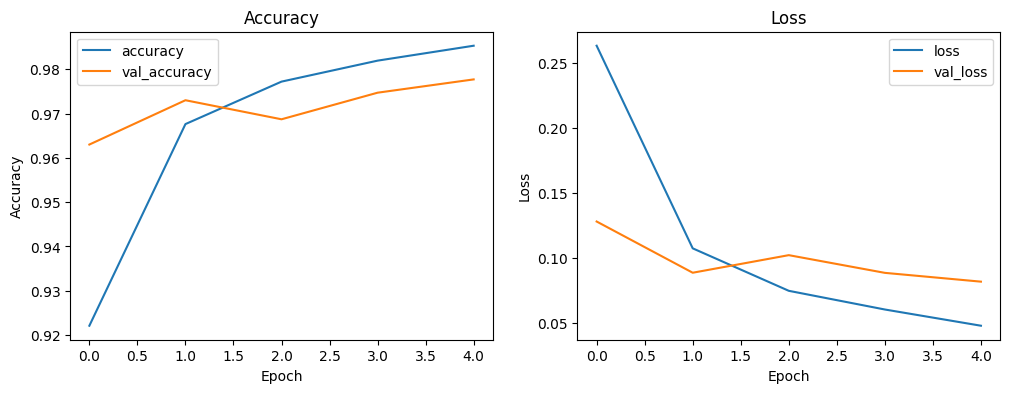

In [16]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8578 - loss: 0.4530 - val_accuracy: 0.9656 - val_loss: 0.1151
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9685 - loss: 0.1075 - val_accuracy: 0.9713 - val_loss: 0.0986
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 45ms/step - accuracy: 0.9794 - loss: 0.0703 - val_accuracy: 0.9702 - val_loss: 0.1028
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9835 - loss: 0.0563 - val_accuracy: 0.9785 - val_loss: 0.0747
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9875 - loss: 0.0449 - val_accuracy: 0.9744 - val_loss: 0.0928
Training time: 188.0705862045288 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9720 - loss: 0.1041
Test Accuracy: 0.974399983882904
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Precision: 0.9747
Recall: 0.9744
F1 Score: 0.9744


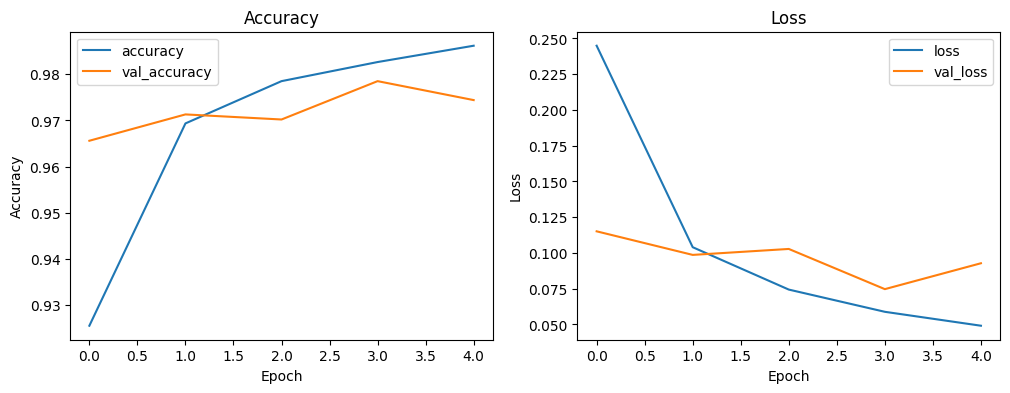

In [17]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 176ms/step - accuracy: 0.8596 - loss: 0.4372 - val_accuracy: 0.9665 - val_loss: 0.1258
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 177ms/step - accuracy: 0.9694 - loss: 0.1137 - val_accuracy: 0.9731 - val_loss: 0.1021
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 173ms/step - accuracy: 0.9784 - loss: 0.0758 - val_accuracy: 0.9751 - val_loss: 0.0952
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 170ms/step - accuracy: 0.9827 - loss: 0.0624 - val_accuracy: 0.9775 - val_loss: 0.0963
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.9849 - loss: 0.0578 - val_accuracy: 0.9759 - val_loss: 0.1027
Training time: 531.4296472072601 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9706 - loss: 0.1319
Test Accuracy: 0.9758999943733215
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Precision: 0.9762
Recall: 0.9759
F1 Score: 0.9759


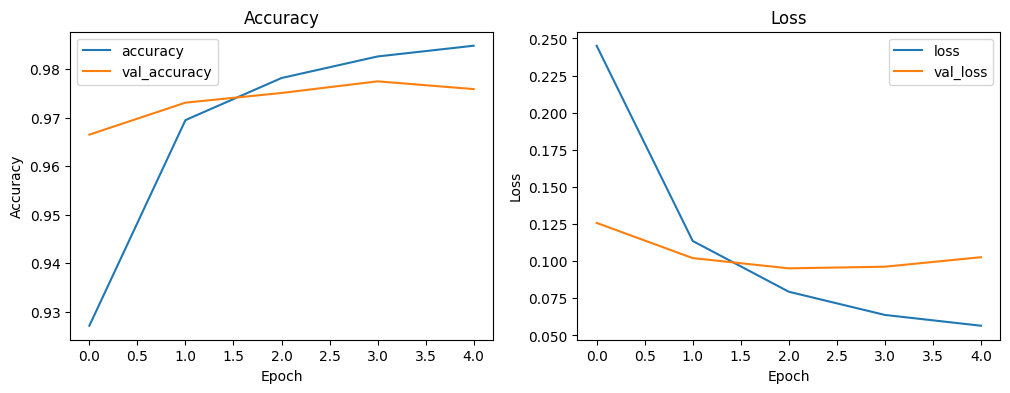

In [18]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

7 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.8270 - loss: 0.5251 - val_accuracy: 0.9587 - val_loss: 0.1347
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9654 - loss: 0.1148 - val_accuracy: 0.9691 - val_loss: 0.1061
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9751 - loss: 0.0858 - val_accuracy: 0.9696 - val_loss: 0.1044
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9722 - val_loss: 0.0967
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9862 - loss: 0.0464 - val_accuracy: 0.9700 - val_loss: 0.1175
Training time: 50.66698908805847 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9644 - loss: 0.1409
Test Accuracy: 0.9700000286102295
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9706
Recall: 0.9700
F1 Score: 0.9700


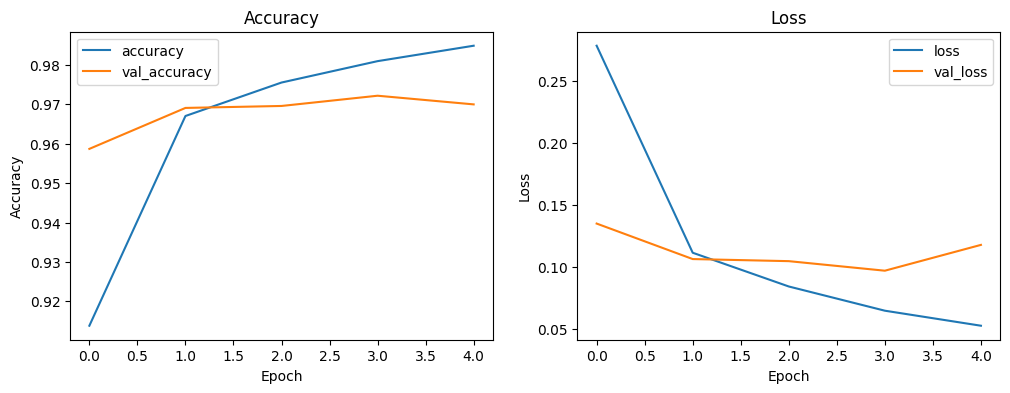

In [19]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.8456 - loss: 0.4771 - val_accuracy: 0.9640 - val_loss: 0.1218
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9675 - loss: 0.1152 - val_accuracy: 0.9695 - val_loss: 0.1088
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.9777 - loss: 0.0810 - val_accuracy: 0.9756 - val_loss: 0.0886
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9824 - loss: 0.0599 - val_accuracy: 0.9732 - val_loss: 0.1061
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9847 - loss: 0.0530 - val_accuracy: 0.9801 - val_loss: 0.0834
Training time: 175.39122891426086 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9766 - loss: 0.0994
Test Accuracy: 0.9800999760627747
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Precision: 0.9802
Recall: 0.9801
F1 Score: 0.9801


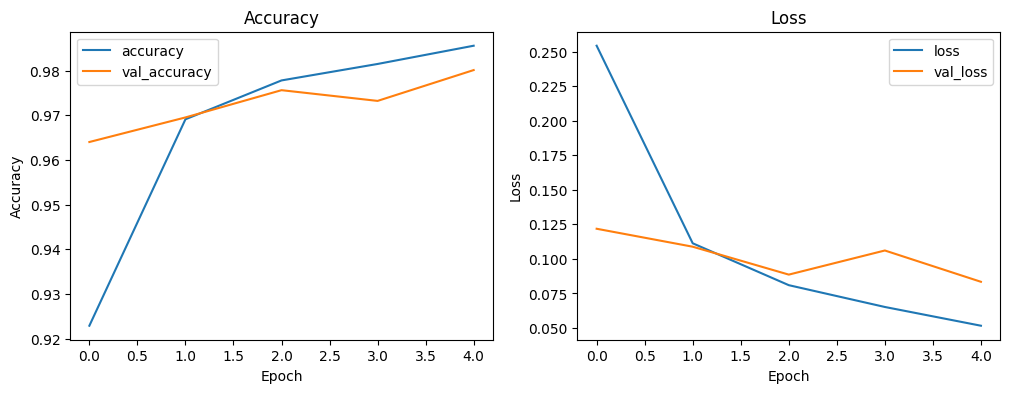

In [20]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 202ms/step - accuracy: 0.8315 - loss: 0.5201 - val_accuracy: 0.9605 - val_loss: 0.1563
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 204ms/step - accuracy: 0.9655 - loss: 0.1290 - val_accuracy: 0.9733 - val_loss: 0.1224
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 202ms/step - accuracy: 0.9772 - loss: 0.0850 - val_accuracy: 0.9690 - val_loss: 0.1351
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 204ms/step - accuracy: 0.9813 - loss: 0.0765 - val_accuracy: 0.9732 - val_loss: 0.1052
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.9822 - loss: 0.0744 - val_accuracy: 0.9777 - val_loss: 0.0954
Training time: 666.1366832256317 seconds
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9737 - loss: 0.1112
Test Accuracy: 0.9776999950408936
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
Precision: 0.9777
Recall: 0.9777
F1 Score: 0.9777


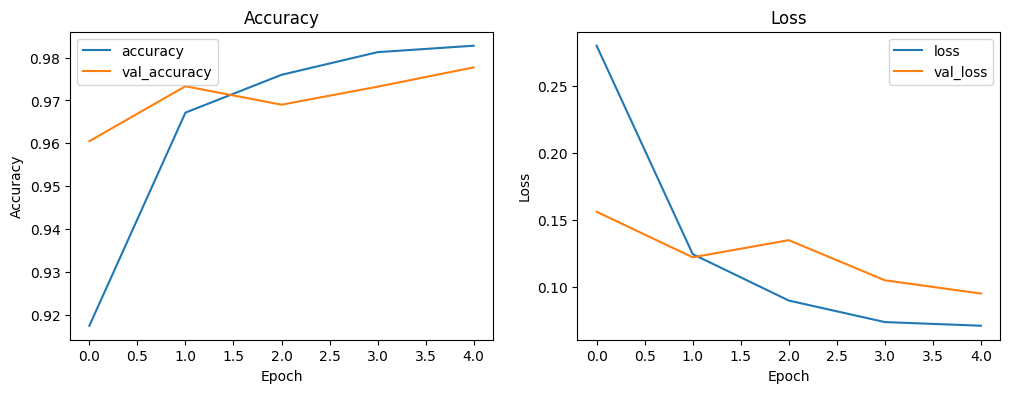

In [21]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=5, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()